**Support Vector Machine Classifier**

The Support Vector Machine (SVM) is a powerful supervised learning algorithm used for both classification and regression tasks. It works by finding the optimal hyperplane that best separates data points of different classes in a high-dimensional space. SVMs are particularly effective in cases where the data is not linearly separable, as they can use kernel functions (like RBF, polynomial, or sigmoid) to project data into higher dimensions for better separation. In this project, we implemented an SVM classifier on the Wine dataset to classify wine samples into different quality classes. The model was trained, tuned, and evaluated to demonstrate SVM’s strength in handling complex decision boundaries and achieving high classification accuracy.

**Loading Preprocessed Data**

In this step, we load the previously saved training and testing datasets using the joblib library. This approach ensures consistency and reproducibility across experiments — allowing us to reuse the same data splits without re-running the entire preprocessing pipeline. The datasets (X_train, X_test, y_train, and y_test) are now ready to be scaled and used for training the Support Vector Machine (SVM) classifier.

In [1]:
import joblib

X_train = joblib.load('/content/X_train.joblib')
X_test = joblib.load('/content/X_test.joblib')
y_train = joblib.load('/content/y_train.joblib')
y_test = joblib.load('/content/y_test.joblib')

print("Train/Test datasets loaded successfully!")


Train/Test datasets loaded successfully!


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")


Features scaled successfully!


In [3]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_scaled, y_train)

print("Baseline SVM model trained successfully!")


Baseline SVM model trained successfully!


In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = svm_clf.predict(X_test_scaled)

print("Baseline SVM Model Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-score:  {f1_score(y_test, y_pred, average='weighted'):.4f}")


Baseline SVM Model Performance:
Accuracy:  0.9722
Precision: 0.9741
Recall:    0.9722
F1-score:  0.9720


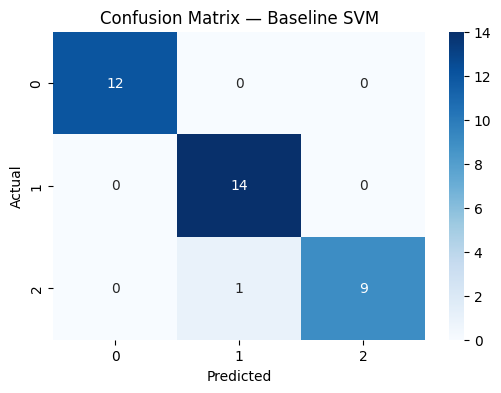

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Baseline SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [6]:
# Hyperparameter Tuning (Before Final Evaluation)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)

best_svm = grid_search.best_estimator_


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [7]:
# Evaluate Tuned Model
y_pred_best = best_svm.predict(X_test_scaled)

print("Tuned SVM Model Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_best, average='weighted'):.4f}")
print(f"F1-score:  {f1_score(y_test, y_pred_best, average='weighted'):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Tuned SVM Model Performance:
Accuracy:  0.9722
Precision: 0.9741
Recall:    0.9722
F1-score:  0.9720

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



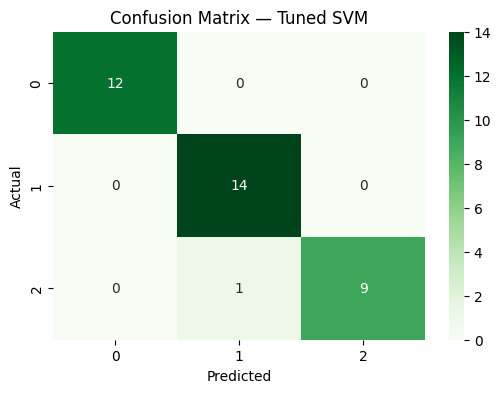

In [8]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix — Tuned SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [11]:
# Cross-Validation
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(best_svm, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print("Cross-validation accuracies:", np.round(cv_scores, 4))
print("Mean CV accuracy:", np.round(cv_scores.mean(), 4))

Cross-validation accuracies: [1.    0.931 1.    1.    1.   ]
Mean CV accuracy: 0.9862


In [12]:
joblib.dump(best_svm, '/content/svm_best_model.joblib')
joblib.dump(scaler, '/content/svm_scaler.joblib')
print("Tuned SVM model and scaler saved successfully!")


Tuned SVM model and scaler saved successfully!
